<a href="https://colab.research.google.com/github/alirezash97/Machine-Learning-Course/blob/main/Final_Project/Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1612106913&Signature=GmMvvMnWZVZ91%2BVhJGQrB2r7z2w5s%2FKJtEaLsK8drRZ%2B4s5vCnfvbjsOg3ZijjSd%2Bf4l6d1dczcZJA0BIS%2FGomA66YjHsj2wKnC6JIApCZWQV290eQLCPTcjLOqjO%2BfaPpC7fVAmnRZPRfUVcar%2BBKZrJQ0QEUUY25%2BhsbhYP%2F2mLdHuAMbd9sg32O4Gp7uWeKnG3fPkf2KcSxvd9SLvh1WNwtmualXT3hhxG5jYATLzVXGQ4Y1UgBBwHnPGkG5Q18MQSgbXfImuFXEW9n0txsuUWk4KlH1ivL9MZJNNs0r6GJfMSksSzshWhg44bd%2BfnNwsPZ1Qgjutx%2F2No4tznQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip'



# !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train_annotations.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1612172751&Signature=mi0KGA%2FqdVG2LrVp2K%2BTofodkKYLyN5lkpYA4oNWQr5blgQtMuxDe1fu7WCS1ICd0HQ5fvAETb6xSS97OXfygJ9iplTVxpq2A9Q6SnaN6LcvVIYPgA9v%2Bc259suwSnGs%2FTgiyT%2BmHOnpgQ13nsFNXpP%2FhjqIo%2F9lkoSKN1BwPW3Woksi%2BE0UkusNBC5hrNO58z5FnVvaH3yGnozFAjzPwrY0M%2Bfh7viGX1%2FO%2BZauz6imQTyGoCcI2Znw3RvVM49bRBjPcwUaD6icFxb%2ByHO2QhV1i4BexBEnpZuqVgVd%2FaKfaiVSvlIMoRe76H%2Bsi7DW2ee6dPyC2F7h9ZdTk2yb4Q%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_annotations.csv.zip'

In [ ]:
# !mkdir /content/trainset
# !mkdir /content/trainset/data/
# !mkdir /content/trainset/data/1/
# !unzip '/content/train.zip' -d /content/trainset/data/1/
# !unzip '/content/train_annotations.csv.zip' -d /content/trainset/annotations/

In [6]:
import pandas as pd 
annotations = pd.read_csv('/content/trainset/annotations/train_annotations.csv')
annotations.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [7]:
len(annotations)

17999

In [8]:
import re
import ast
import numpy as np
def str2array(s):
    # Remove space after [
    s=re.sub('\[ +', '[', s.strip())
    # Replace commas and spaces
    s=re.sub('[,\s]+', ', ', s)
    return np.array(ast.literal_eval(s))

In [10]:
import numpy as np 


msk = np.random.rand(len(annotations)) < 0.4
train_samples = annotations[msk]
validation_samples = annotations[~msk]



sample = annotations.iloc[1, :]
landmarks = sample['data']
print(landmarks)
landmarks = np.array(str2array(landmarks))
print(type(landmarks))
# landmarks = np.array(list(landmarks))
print(landmarks.shape)
print(landmarks)

# print('Image name: {}'.format(img_name))
# print('Landmarks shape: {}'.format(landmarks.shape))
# print('First 4 Landmarks: {}'.format(landmarks[:4]))

[[1328, 7], [1347, 101], [1383, 193], [1400, 267], [1411, 366], [1400, 428], [1387, 545], [1394, 640], [1400, 707], [1417, 783], [1432, 852], [1462, 953], [1457, 1006]]
<class 'numpy.ndarray'>
(13, 2)
[[1328    7]
 [1347  101]
 [1383  193]
 [1400  267]
 [1411  366]
 [1400  428]
 [1387  545]
 [1394  640]
 [1400  707]
 [1417  783]
 [1432  852]
 [1462  953]
 [1457 1006]]


In [11]:
from PIL import Image
import random
import torch.nn.functional as F
from math import cos, sin, radians
import imutils
import cv2


class RANZCRDataset():


    def __init__(self, csv_file='/content/trainset/train.csv', root_dir='/content/trainset/data/1', transform=None, images_name=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.Images_name = images_name
        self.root_dir = root_dir
        self.transform = transform
        

    def __len__(self):
        return len(self.Images_name)

    #############


    # def get_rot_mat(self, theta):

    #   theta = torch.tensor(theta)
    #   return torch.tensor([[torch.cos(theta), -torch.sin(theta), 0],
    #                         [torch.sin(theta), torch.cos(theta), 0]])


    # def rot_img_landmark(self, x, landmarks, theta, dtype):
    #     rot_mat = self.get_rot_mat(theta)[None, ...].type(dtype).repeat(x.shape[0],1,1)
    #     grid = F.affine_grid(rot_mat, x.size()).type(dtype)
    #     image = F.grid_sample(x, grid)
    #     landmarks = landmarks - 0.5
    #     new_landmarks = np.matmul(landmarks, transformation_matrix)
    #     new_landmarks = new_landmarks + 0.5
    #     return image, new_landmarks


    ##############

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.Images_name.iloc[idx, 0])
        image = Image.open(img_name + '.jpg').convert('RGB')
        labels = self.Images_name.iloc[idx, -1]
        labels = torch.from_numpy(str2array(labels))
        sample = {'image': image, 'label': labels }


        if self.transform:

          
          tmp = np.zeros((68, 2))

          for i in range(sample['label'].shape[0]):

            tmp[i, 0] = (centerCrop_value / np.array(image).shape[1]) * np.array(sample['label'])[i, 0]
            tmp[i, 1] = (centerCrop_value / np.array(image).shape[0]) * np.array(sample['label'])[i, 1]
             

          sample['label'] = torch.from_numpy(tmp).type(torch.float16)


          sample['image'] = self.transform(sample['image'])


          # # random rotation
          # image, landmark = self.rot_img_landmark(sample['image'], sample['label'], np.pi/2, dtype= torch.FloatTensor)
          # print(type(image), image.shape)
          # print(type(landmark), landmark.shape)
          

        return sample

# my_dataset = RANZCRDataset
# my_dataset.__getitem__(self, 4)

In [12]:

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch
import torchvision
import os

batch_size = 8
mean = np.array([0.4823, 0.4823, 0.4823])
std = np.array([0.191473164, 0.191473164, 0.191473164])

centerCrop_value = 244
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((256, 256)),
                                transforms.CenterCrop(centerCrop_value),
                                transforms.Normalize(mean, std)])



trainset = RANZCRDataset(csv_file='/content/trainset/annotations/train_annotations.csv',
                                    root_dir='/content/trainset/data/1', transform=transform, images_name=train_samples)


train_loader = torch.utils.data.DataLoader(trainset,
                         batch_size=batch_size,
                         num_workers=0,
                         shuffle=True)


validation_set = RANZCRDataset(csv_file='/content/trainset/annotations/train_annotations.csv',
                                    root_dir='/content/trainset/data/1', transform=transform, images_name=validation_samples)


validation_loader = torch.utils.data.DataLoader(trainset,
                         batch_size=batch_size,
                         num_workers=0,
                         shuffle=True)





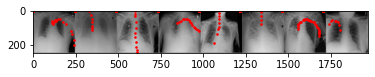

torch.Size([8, 68, 2])
torch.Size([8, 3, 244, 244])


In [13]:
import matplotlib.pyplot as plt


def imshow(img, landmarks):
    npimg = img.numpy()
    npimg = ((npimg * std[0]) + mean[0]) # unnormalize
    plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))
    for i in range(landmarks.shape[0]):
      landmarks[i, :, 0] = landmarks[i, :, 0] + (centerCrop_value*i)
    plt.scatter(landmarks[:, :, 0], landmarks[:, :, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# get some random training images
dataiter = iter(train_loader)
sample = dataiter.next()

imshow(torchvision.utils.make_grid(sample['image']), sample['label'])
print(sample['label'].shape)
print(sample['image'].shape)

In [ ]:
# class Network(nn.Module):
  
#   def __init__(self):
#     super(Network, self).__init__()
#     self.model = model
#     self.conv1 = nn.Conv2d(3, 3, 5)
#     self.conv2 = nn.Conv2d(3, 3, 1)
#     self.pool2 = nn.MaxPool2d(2, 2)
#     self.sigmoid = nn.Sigmoid()
#     self.fc_final = nn.Linear(1000, 11)

#   def forward(self, x):

#     x = self.pool2(F.relu(self.conv1(x)))
#     x = self.pool2(F.relu(self.conv2(x)))
#     x = self.model(x)
#     x = self.sigmoid(self.fc_final(x))
#     return x

# Network = Network()

In [14]:
import torch.nn as nn
from torchvision import models
from torch import optim
import time

model = models.resnet152(pretrained=False)

class Network(nn.Module):
    def __init__(self,num_classes=136):
        super().__init__()
        self.model_name='resnet18'
        self.model=model
        self.fc_final = nn.Linear(1000, 136)
        
    def forward(self, x):
        x = self.model(x)
        x = F.relu(self.fc_final(x))
        return x

In [15]:
Network = Network()
criterion = nn.MSELoss()
optimizer = optim.Adam(Network.parameters(), lr=0.0075, weight_decay=1e-06)


In [16]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(count_parameters(model))
print(count_parameters(Network))

60192808
60328944


In [ ]:

for epoch in range(40):

  running_loss = 0.0
  best_validation_loss = 1000000000000

  for batch_number, data in enumerate(train_loader, 0):
    
  
    inputs = data['image'].float()
    label_temp = data['label']
    label = np.zeros((batch_size, 136))
    for i in range(batch_size):
      if label_temp.shape[0] == batch_size:
        label[i, :68] = label_temp[i, :, 0]
        label[i, 68:] = label_temp[i, :, 1]
      else:
        pass

    label = torch.from_numpy(label).float()
    optimizer.zero_grad()
    outputs = Network(inputs)
    loss = criterion(outputs, label)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if (batch_number % 10 == 0) and (batch_number > 9):
      print('[epoch: %d, batch: %5d] training loss: %.3f' %( epoch + 1, batch_number, (running_loss/10)))
      
      dataiter = iter(validation_loader)
      sample = dataiter.next()
      validation_inputs = sample['image'].float()
      validation_label_temp = data['label']
      validation_label = np.zeros((batch_size, 136))
      for i in range(batch_size):
        if validation_label_temp.shape[0] == batch_size:
          validation_label[i, :68] = validation_label_temp[i, :, 0]
          validation_label[i, 68:] = validation_label_temp[i, :, 1]
        else:
          pass

      validation_label = torch.from_numpy(validation_label).float()
      validation_outputs = Network(validation_inputs)
      validation_loss = criterion(validation_outputs, validation_label)
      

      print('[epoch: %d, batch: %5d] <validation 10 random sample> loss: %.3f' %( epoch + 1, batch_number, validation_loss))


      running_loss = 0.0

  try:
    if validation_loss < best_validation_loss:
      torch.save(Network.state_dict(), '/content/drive/MyDrive/landmarks.pth')
      best_validation_loss = validation_loss
  except ValueError:
    pass
  
    
print('Finished Training Network')

[epoch: 1, batch:    10] training loss: 1570.635
[epoch: 1, batch:    10] <validation 10 random sample> loss: 843.638
[epoch: 1, batch:    20] training loss: 1057.810
[epoch: 1, batch:    20] <validation 10 random sample> loss: 1391.703
[epoch: 1, batch:    30] training loss: 960.650
[epoch: 1, batch:    30] <validation 10 random sample> loss: 652.755
[epoch: 1, batch:    40] training loss: 1222.799
[epoch: 1, batch:    40] <validation 10 random sample> loss: 949.858
[epoch: 1, batch:    50] training loss: 938.923
[epoch: 1, batch:    50] <validation 10 random sample> loss: 509.950
[epoch: 1, batch:    60] training loss: 1030.899
[epoch: 1, batch:    60] <validation 10 random sample> loss: 762.595
[epoch: 1, batch:    70] training loss: 1215.795
[epoch: 1, batch:    70] <validation 10 random sample> loss: 1417.153
[epoch: 1, batch:    80] training loss: 893.683
[epoch: 1, batch:    80] <validation 10 random sample> loss: 1039.480
[epoch: 1, batch:    90] training loss: 1018.521
[epoch:

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([8, 200])) that is different to the input size (torch.Size([7, 200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: ignored

In [ ]:
# network = Network()
# network.cuda()    

# criterion = nn.MSELoss()
# optimizer = optim.Adam(network.parameters(), lr=0.0001)

# loss_min = np.inf
# num_epochs = 10

# start_time = time.time()
# for epoch in range(1,num_epochs+1):
    
#     loss_train = 0
#     loss_valid = 0
#     running_loss = 0
    
#     network.train()
#     for step in range(1,len(loader)+1):

#         sample = next(iter(loader))
#         images, landmarks = sample['image'], sample['label']
        
#         images = images.cuda()
#         landmarks = landmarks.view(landmarks.size(0),-1).cuda() 
        
#         predictions = network(images)
        
#         # clear all the gradients before calculating them
#         optimizer.zero_grad()
        
#         # find the loss for the current step
#         loss_train_step = criterion(predictions, landmarks)
        
#         # calculate the gradients
#         loss_train_step.backward()
        
#         # update the parameters
#         optimizer.step()
        
#         loss_train += loss_train_step.item()
#         running_loss = loss_train/step
        
#         # print_overwrite(step, len(train_loader), running_loss, 'train')
        
#     network.eval() 
#     with torch.no_grad():
        
#         for step in range(1,  3): #len(loader)+1):
            
#             images, landmarks = next(iter(loader))
        
#             images = images.cuda()
#             landmarks = landmarks.view(landmarks.size(0),-1).cuda()
        
#             predictions = network(images)

#             # find the loss for the current step
#             loss_valid_step = criterion(predictions, landmarks)

#             loss_valid += loss_valid_step.item()
#             running_loss = loss_valid/step

#             print_overwrite(step, len(valid_loader), running_loss, 'valid')
    
#     loss_train /= len(train_loader)
#     loss_valid /= len(valid_loader)
    
#     print('\n--------------------------------------------------')
#     print('Epoch: {}  Train Loss: {:.4f}  Valid Loss: {:.4f}'.format(epoch, loss_train, loss_valid))
#     print('--------------------------------------------------')
    
#     if loss_valid < loss_min:
#         loss_min = loss_valid
#         torch.save(network.state_dict(), '/content/face_landmarks.pth') 
#         print("\nMinimum Validation Loss of {:.4f} at epoch {}/{}".format(loss_min, epoch, num_epochs))
#         print('Model Saved\n')
     
# print('Training Complete')
# print("Total Elapsed Time : {} s".format(time.time()-start_time))

KeyboardInterrupt: ignored

In [ ]:
# find dataset mean and std

# import torch
# from torch import Tensor
# from typing import Iterable
# from fastprogress import progress_bar

# class RunningStatistics:
#     '''Records mean and variance of the final `n_dims` dimension over other dimensions across items. So collecting across `(l,m,n,o)` sized
#        items with `n_dims=1` will collect `(l,m,n)` sized statistics while with `n_dims=2` the collected statistics will be of size `(l,m)`.
#        Uses the algorithm from Chan, Golub, and LeVeque in "Algorithms for computing the sample variance: analysis and recommendations":
#        `variance = variance1 + variance2 + n/(m*(m+n)) * pow(((m/n)*t1 - t2), 2)`
#        This combines the variance for 2 blocks: block 1 having `n` elements with `variance1` and a sum of `t1` and block 2 having `m` elements
#        with `variance2` and a sum of `t2`. The algorithm is proven to be numerically stable but there is a reasonable loss of accuracy (~0.1% error).
#        Note that collecting minimum and maximum values is reasonably innefficient, adding about 80% to the running time, and hence is disabled by default.
#     '''
#     def __init__(self, n_dims:int=2, record_range=False):
#         self._n_dims,self._range = n_dims,record_range
#         self.n,self.sum,self.min,self.max = 0,None,None,None
    
#     def update(self, data:Tensor):

#         data = data.view(*list(data.shape[:-self._n_dims]) + [-1])
#         with torch.no_grad():
#             new_n,new_var,new_sum = data.shape[-1],data.var(-1),data.sum(-1)
#             if self.n == 0:
#                 self.n = new_n
#                 self._shape = data.shape[:-1]
#                 self.sum = new_sum
#                 self._nvar = new_var.mul_(new_n)
#                 if self._range:
#                     self.min = data.min(-1)[0]
#                     self.max = data.max(-1)[0]
#             else:
#                 # assert data.shape[:-1] == self._shape, f"Mismatched shapes, expected {self._shape} but got {data.shape[:-1]}."
#                 ratio = self.n / new_n
#                 t = (self.sum / ratio).sub_(new_sum).pow_(2)
#                 self._nvar.add_(new_n, new_var).add_(ratio / (self.n + new_n), t)
#                 self.sum.add_(new_sum)
#                 self.n += new_n
#                 if self._range:
#                     self.min = torch.min(self.min, data.min(-1)[0])
#                     self.max = torch.max(self.max, data.max(-1)[0])

#     @property
#     def mean(self): return self.sum / self.n if self.n > 0 else None
#     @property
#     def var(self): return self._nvar / self.n if self.n > 0 else None
#     @property
#     def std(self): return self.var.sqrt() if self.n > 0 else None

#     def __repr__(self):
#         def _fmt_t(t:Tensor):
#             if t.numel() > 5: return f"tensor of ({','.join(map(str,t.shape))})"
#             def __fmt_t(t:Tensor):
#                 return '[' + ','.join([f"{v:.3g}" if v.ndim==0 else __fmt_t(v) for v in t]) + ']'
#             return __fmt_t(t)
#         rng_str = f", min={_fmt_t(self.min)}, max={_fmt_t(self.max)}" if self._range else ""
#         return f"RunningStatistics(n={self.n}, mean={_fmt_t(self.mean)}, std={_fmt_t(self.std)}{rng_str})"

# def collect_stats(items:Iterable, n_dims:int=2, record_range:bool=False):
#     stats = RunningStatistics(n_dims, record_range)
#     for it in progress_bar(items.next()):
#         it = it.float()
#         if hasattr(it, 'data'):
#             stats.update(it.data)
#         else:
#             stats.update(it)
#     return stats

# dd = RunningStatistics
# stats = collect_stats(dataiter)
# stats


In [ ]:
# stats.mean.mean(axis=0)

tensor([0.5057, 0.5057, 0.5057])

In [ ]:
# stats.std.mean(axis=0)

tensor([0.1902, 0.1902, 0.1902])